# Описание проекта

# Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Описание данных

файл **hypothesis.csv**

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

файл **orders.csv**

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

файл **visitors.csv**

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-тест

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings
register_matplotlib_converters()

In [2]:
try:
    hypothesis, orders, visitors = (
    pd.read_csv('hypothesis.csv'),  
    pd.read_csv('orders.csv'),  
    pd.read_csv('visitors.csv')  
)
except FileNotFoundError:
    hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  
    pd.read_csv('/datasets/orders.csv'),  
    pd.read_csv('/datasets/visitors.csv'), 
)

In [3]:
display(hypothesis.head())
display (orders.head())
display (visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.rename(columns={'transactionId': 'orderId', 'visitorId': 'userId'}, inplace=True)

# Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

## Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


## Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


В фреймоврке ICE в топ 3 вошли следующие гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Тогда как в фреймоврке RICE в топ 3 вошли такие гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Таким образом, у нас есть 2 перекрестные гипотезы по двум фрейморкам, гипотезы № 7 и гипотеза 0, а именно:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

В фрейморке RICE уитывается охват аудитории которую затронет гипотеза, именно поэтому места и иногда и гипотезы стоят на разных местах в фреймворках ICE и RICE. У гипотезы номер 7 - самый высокий коэффициент охвата, именно поэтому она вышла на первое место в RICE. 

# Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv

## Графики кумулятивной выручки по группам и кумулятивного среднего чека по группам. Выводы и предположения

In [7]:
display (orders.head())
display (visitors.head())

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
users_cross = orders[(orders['group'] == 'B') & (orders['userId'].isin(list(orders[orders['group'] == 'A']['userId'].unique())) )]

In [9]:
orders = orders[~orders['userId'].isin(list(users_cross['userId']))]

In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [11]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': 'nunique',
            'userId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

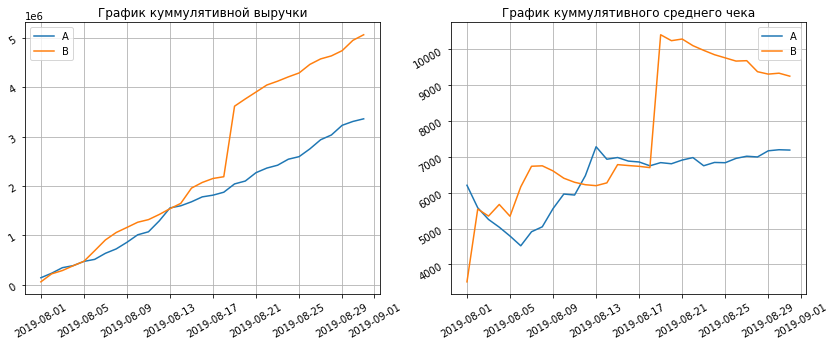

In [12]:
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(14,5))
ax = axs[0]
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
ax.set_title('График куммулятивной выручки')
ax.grid()
ax.legend()
ax.tick_params(labelrotation=30)

ax = axs[1]
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
ax.set_title('График куммулятивного среднего чека')
ax.grid()
ax.legend()
ax.tick_params(labelrotation=30);

Начиная с 13 августа, группа B уверенно вырывается вперед по выручке и продолжаеи лидировать на всем протяжении теста. Куммулятивный средний чек резко вырывается вперед c 17 августа и остается выше чем у группы А на протяжении всего теста. Видимо присутсвуют аномально большие заказы, надо будем глянуть

## График относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения

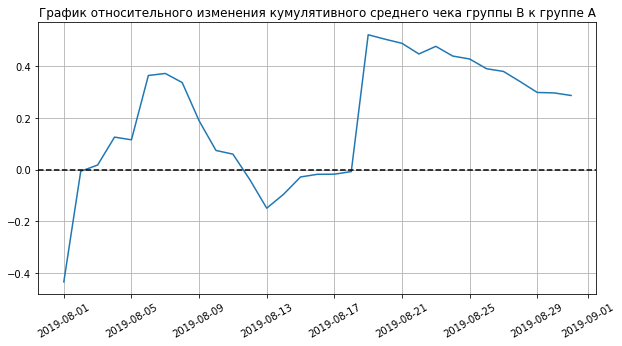

In [13]:


# cтроим отношение средних чеков
plt.figure(figsize=(10,5))
plt.plot(
    mergedCumulativeRevenue['date'], (
        mergedCumulativeRevenue['revenueB']
        /mergedCumulativeRevenue['ordersB'])
    /(mergedCumulativeRevenue['revenueA']
      /mergedCumulativeRevenue['ordersA'])-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.xticks(rotation=30)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

В начале теста группа B резко вырвалась вперед, затем начала падать и начиная с 17 августа и до конца теста опять вырвалась в лидеры. Наверное в эти дни были совершены аномальные покупки, которые стоит изучить в будующем

## График кумулятивной конверсии по группам. Выводы и предположения

In [14]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

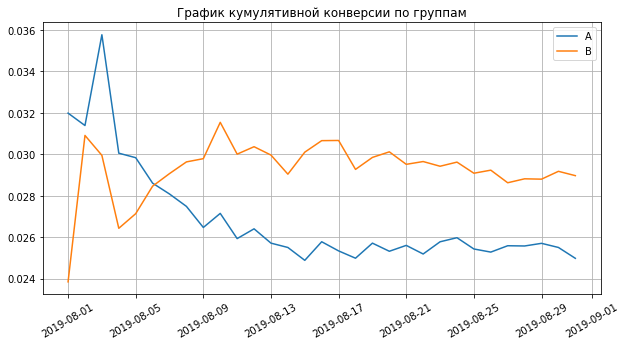

In [15]:
# строим графики
plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.grid()
plt.xticks(rotation=30)
plt.title('График кумулятивной конверсии по группам');

В начале теста конверсия группы А была выше чем конверсия группы В, однако начиная с 5 августа, конверсия группы В стала значительно выше и +/- зафиксировалась на уровнях 0,033 - 0,035, конверсия же группы А пошла вниз, и начиная с середины теста зафиксировалась на уровнях 0,029 - 0,031

## График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения

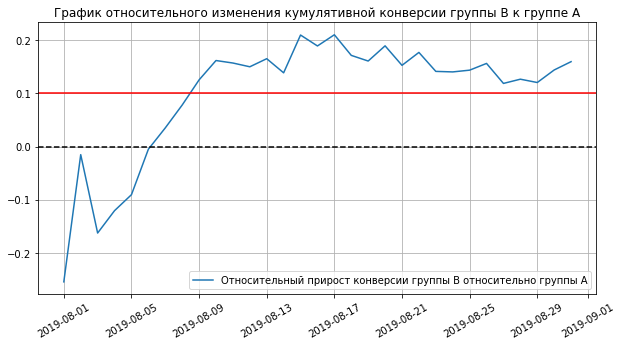

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.grid()
plt.xticks(rotation=30)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.1, color='red', linestyle='-');

Как я писал выше, в начале теста по конверсии лидировала группа А, однако уже с 9 августа, относительный прирост конверсии группы В к группе А превысил 10% и концу теста остался выше этого уровня прироста

## Точечный график количества заказов по пользователям. Выводы и предположения

In [17]:
ordersByUsers = (
    orders.groupby('userId', as_index=False)
    .agg({'orderId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

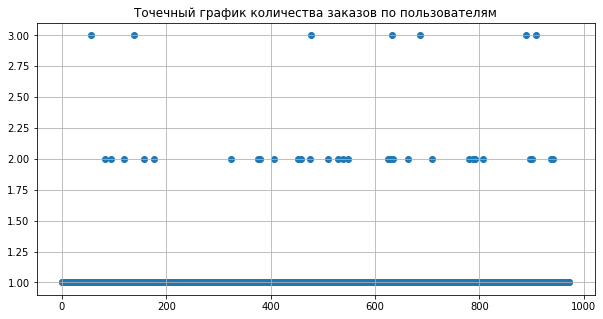

In [18]:
plt.figure(figsize=(10,5))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.grid()
plt.title('Точечный график количества заказов по пользователям');

Основная масса заказов - 1 раз, пользователей заказавших больше чем 2 раза мало, надо выяснить являются ли они аномальными

## 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [19]:
per_95, per_99 = np.percentile(ordersByUsers['orders'], [95, 99])
print(f'Не более 5% пользователей заказывают больше чем {int(per_95)} раза')
print(f'Не более 1% пользователей заказывают больше чем {int(per_99)} раза')

Не более 5% пользователей заказывают больше чем 1 раза
Не более 1% пользователей заказывают больше чем 2 раза


Думаю что ограничим выборку 2 заказами и меньше

## Точечный график стоимостей заказов.  Выводы и предположения

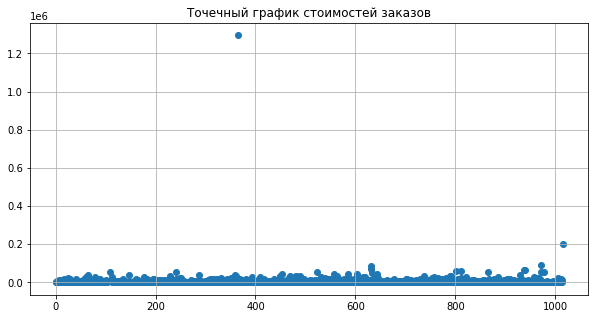

In [20]:
plt.figure(figsize=(10,5))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.title('Точечный график стоимостей заказов');

В целом почти все заказы расположены до 100 000, даже выше 200 000 рублей за заказ уже выглядит как аномалия, есть заказа выше 1,2 млн рублей )

## 95-й и 99-й перцентили стоимости заказов. Выбор границ для определения аномальных заказов

In [21]:
per_95, per_99 = np.percentile(orders['revenue'], [95, 99])
print(f'Не более 5% пользователей заказывают больше чем на {int(per_95)} у.е.')
print(f'Не более 1% пользователей заказывают больше чем {int(per_99)} у.е.')

Не более 5% пользователей заказывают больше чем на 26785 у.е.
Не более 1% пользователей заказывают больше чем 53904 у.е.


Думаю что тут поступим так же как и с количеством заказаов, возьмем 95% всех пользователей, а именно тех, у кого заказ не выше чем 28 000

## Считает статистическую значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения

- H0: Конверсии в группах А и В не отличаются
- Н1: Конверсии отличаются

In [22]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0
                   )

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0
                   )

In [24]:
alpha = 0.05

In [25]:
p_value = stats.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]
difference = sampleB.mean() / sampleA.mean() - 1

In [26]:
print(f' p_value = {p_value:.4f}')
if p_value < alpha:
    print(' p_value меньше alpha, нулевую гипотезу отвергаем, по сырым данным есть стат значимая разница в конверсии')
    print(f' И эта разница составляет: {difference:.2%}')
else:
    print(' p_value больше alpha, нулевую гипотезу отвергнуть не получилось')

 p_value = 0.0110
 p_value меньше alpha, нулевую гипотезу отвергаем, по сырым данным есть стат значимая разница в конверсии
 И эта разница составляет: 15.98%


In [27]:
print('Значение P_value:')
print(f'{p_value:.4f}')
print('Относительный прирост конверсии группы В к группе А по сырым данным:')
print(f'{difference:.2%}')

Значение P_value:
0.0110
Относительный прирост конверсии группы В к группе А по сырым данным:
15.98%


## Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения

- H0: Средний чек в группах А и В не отличаются
- Н1: Средний чек в группах А и В отличается

In [28]:
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative="two-sided")[1]
difference = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1

In [29]:
print(f' p_value = {p_value:.4f}')
if p_value < alpha:
    print(' p_value меньше alpha, нулевую гипотезу отвергаем, по сырым данным есть стат значимая разница в конверсии')
    print(f'И эта разница составляет: {difference:.2%}')
else:
    print(' p_value больше alpha, нулевую гипотезу отвергнуть не получилось')
print(f' Относительное раличие среднего чека между группами {difference:.2%}')

 p_value = 0.8295
 p_value больше alpha, нулевую гипотезу отвергнуть не получилось
 Относительное раличие среднего чека между группами 28.66%


Хоть мы и видим довольно большую относительную разницу между средними чеками, однако стат значимости по сырым данным достигнуть не удалось. Утверждать что средний чек изменился по группам пока нельзя

In [30]:
print('Значение P_value:')
print(f'{p_value:.4f}')
print('Относительный прирост среднего чека группы В к группе А по сырым данным:')
print(f'{difference:.2%}')

Значение P_value:
0.8295
Относительный прирост среднего чека группы В к группе А по сырым данным:
28.66%


## Cтатистическая значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения

- H0: Конверсия в группах А и В по очищенным данным не отличаются
- Н1: Конверсия в группах А и В по очищенным данным отличается

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(f'Всего иссключено: {abnormalUsers.shape[0]} пользователя')

Всего иссключено: 55 пользователя


In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [33]:
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")[1]
difference = sampleBFiltered.mean()/sampleAFiltered.mean()-1

In [34]:
print(f' p_value = {p_value:.4f}')
if p_value < alpha:
    print(' p_value меньше alpha, нулевую гипотезу отвергаем, по очищенным данным есть стат значимая разница в конверсии')
    print(f' И эта разница составляет: {difference:.2%}')
else:
    print(' p_value больше alpha, нулевую гипотезу отвергнуть не получилось')

 p_value = 0.0095
 p_value меньше alpha, нулевую гипотезу отвергаем, по очищенным данным есть стат значимая разница в конверсии
 И эта разница составляет: 18.86%


In [35]:
print('Значение P_value:')
print(f'{p_value:.4f}')
print('Относительный прирост конверсии группы В к группе А по очищенным данным:')
print(f'{difference:.2%}')

Значение P_value:
0.0095
Относительный прирост конверсии группы В к группе А по очищенным данным:
18.86%


## Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения

- H0: Средний чек в группах А и В по очищенным данным не отличаются
- Н1: Средний чек в группах А и В по очищенным данным отличается

In [36]:
B_mean = orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()
A_mean = orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()

In [37]:
p_value = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative="two-sided"
        )[1]

difference = B_mean / A_mean - 1

In [38]:
print(f' p_value = {p_value:.4f}')
if p_value < alpha:
    print(' p_value меньше alpha, нулевую гипотезу отвергаем, по очищенным данным есть стат значимая разница в конверсии')
    print(f'И эта разница составляет: {difference:.2%}')
else:
    print(' p_value больше alpha, нулевую гипотезу отвергнуть не получилось')
print(f' Относительное различие среднего чека между группами {difference:.2%}')

 p_value = 0.7617
 p_value больше alpha, нулевую гипотезу отвергнуть не получилось
 Относительное различие среднего чека между группами -2.24%


In [39]:
print('Значение P_value:')
print(f'{p_value:.4f}')
print('Относительный прирост среднего чека группы В к группе А по очищенным данным:')
print(f'{difference:.2%}')

Значение P_value:
0.7617
Относительный прирост среднего чека группы В к группе А по очищенным данным:
-2.24%


# Итоговое решение по A/B тесту

**Проанализировав данные по результатам A/B теста, можно сделать следующие выводы:**

Начиная с 13 августа, группа B уверенно вырывается вперед по выручке и продолжает лидировать на всем протяжении теста. Кумулятивный средний чек резко вырывается вперед c 17 августа и остается выше чем у группы А на протяжении всего теста. На этом этапе мы заметили что присутствуют аномалии в среднем чеке, которые мы в последствии удалим.

По относительным изменениям, в начале теста, группа B резко вырвалась вперед, затем начала падать и начиная с 17 августа и до конца теста опять вырвалась в лидеры. Тут так же было предположено о наличии аномалий в суммах покупок.



В начале теста конверсия группы А была выше чем конверсия группы В, однако начиная с 5 августа, конверсия группы В стала значительно выше и +/- зафиксировалась на уровнях 0,033 - 0,035, конверсия же группы А пошла вниз, и начиная с середины теста зафиксировалась на уровнях 0,029 - 0,031.

По относительным изменениям конверсии, в начале теста по конверсии лидировала группа А, однако уже с 9 августа, относительный прирост конверсии группы В к группе А превысил 10% и концу теста остался выше этого уровня прироста.



Изучая результаты А/В теста на сырых данных, была обнаружена статистическая значимость в изменения конверсий между группами. Выяснилось, что у "сырых" данных, конверсия в группе В выше на 13.81% чем в группе А и эта разница имеет стат. значимость.



Так же, изучая сырые данные относительно среднего чека, выяснилось что статистической значимости между группами по изменению среднего чека не обнаружено. Хоть мы и видим довольно большую относительную разницу между средними чеками,  однако утверждать что средний чек изменился по группам пока нельзя.



Изучая аномалии, я пришел к выводу что:

- Основная масса заказов - 1 покупка, пользователей заказавших больше чем 2 раза мало, меньше 5%.

- Не более 5% пользователей заказывают больше чем на 28000

Исходя из вышесказанного, было принято решение исключить 5% пользователей, а именно тех у кого количество заказов больше 2 и сумма заказа больше 28 000, таким образом было исключено 74 пользователя.



Изучая "очищенные" данные на предмет изменения конверсии, было обнаружено что по очищенным данным есть стат. значимая разница в конверсии, которая составила 15.98%.

Однако стат значимой разницы в среднем чеке обнаружить не удалось.

**Посему предлагаю тест прекратить, группу В признать победившей по конверсии и изменения принять.**